# Exploratory Data Analysis

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

**Data Loading**

In [47]:
airbnb = pd.read_csv(r'C:\Users\spider\Documents\Springboard\GitHub\NYC-Airbnb\DataWrangling\Data_wrangling\airbnb_data_cleaned.csv')

In [12]:
airbnb.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2762,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2976,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,3021,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2793,0.10,1,0


In [13]:
airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393628e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
last_review,48895.0,2.182322e+03,1.169873e+03,0.00000,1.823000e+03,2.838000e+03,3.005000e+03,3.024000e+03
reviews_per_month,48895.0,1.090910e+00,1.597283e+00,0.00000,4.000000e-02,3.700000e-01,1.580000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02


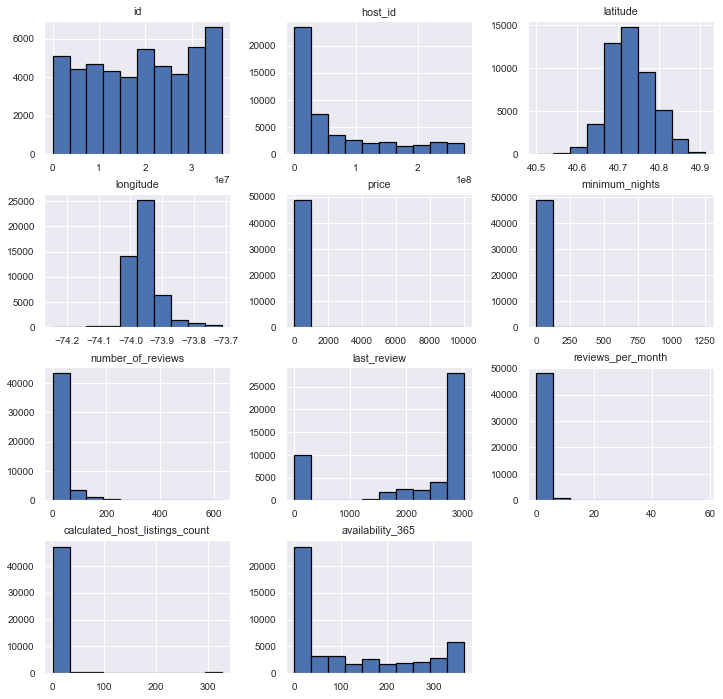

In [190]:
#histograms for each variable in airbnb
airbnb.hist(edgecolor="black", linewidth=1.2, figsize =(12,12));

<Figure size 720x720 with 0 Axes>

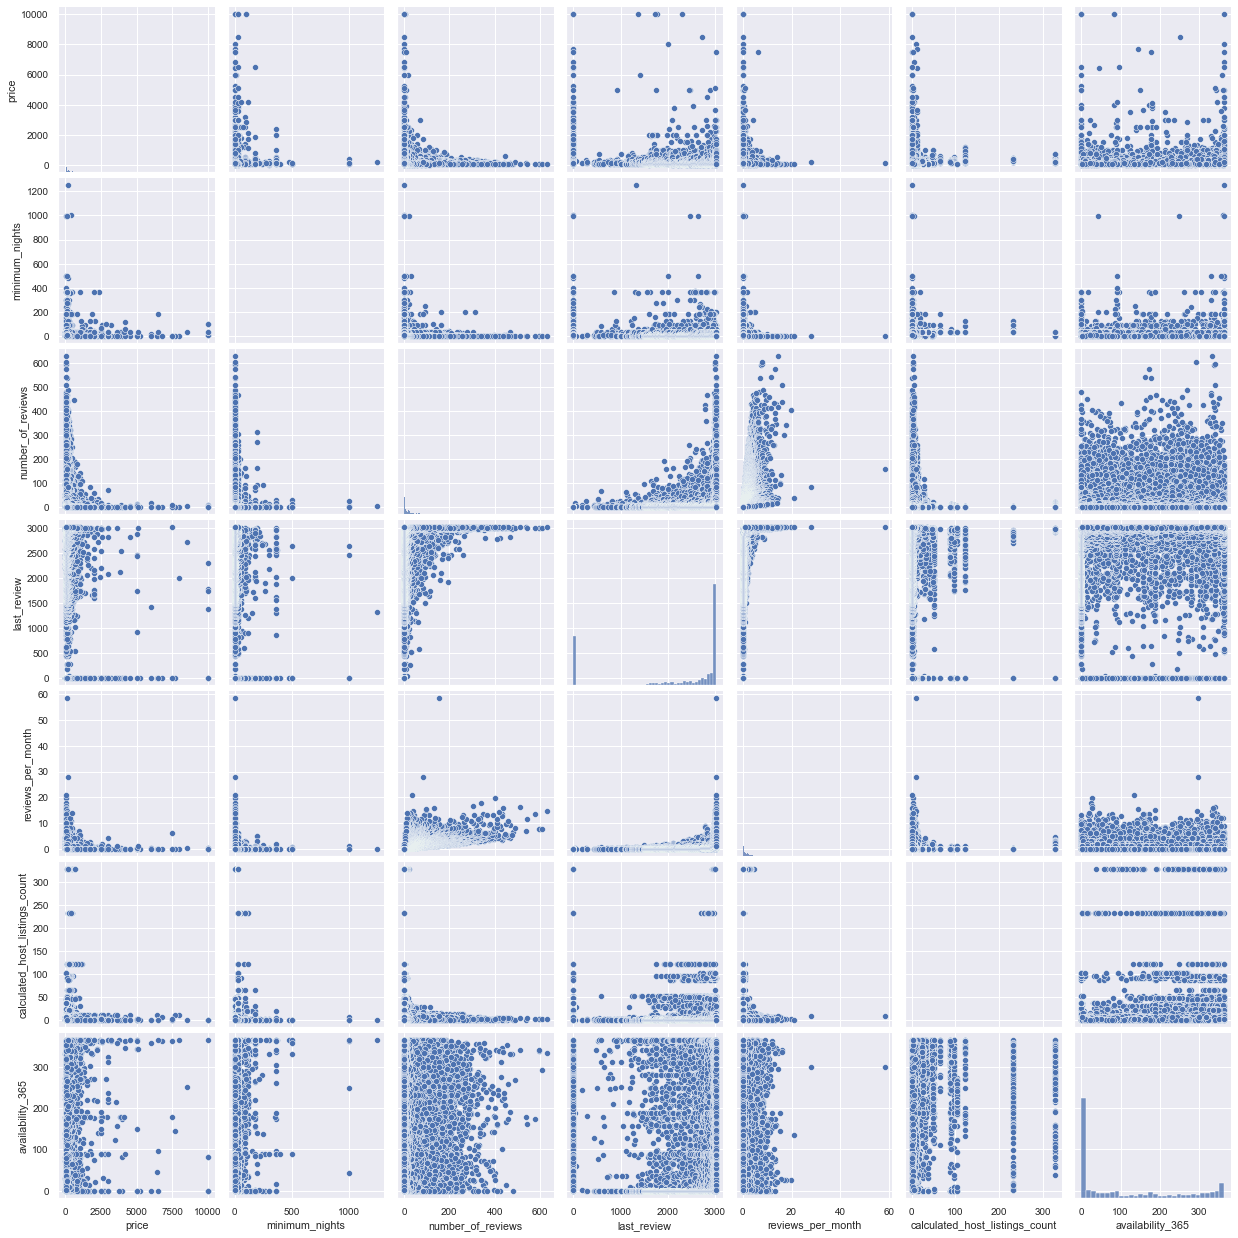

In [197]:
#Pairplot for each variable in airbnb
data = airbnb[['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
plt.figure(figsize=(10, 10))
sns.pairplot(data,diag_kind="hist")

**Pie Chart for Categorical Values**

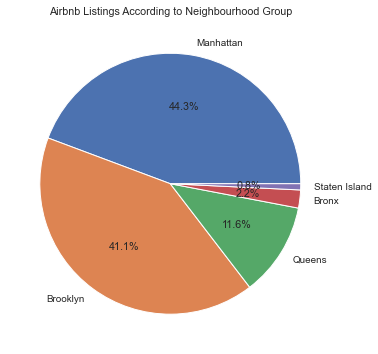

In [195]:
labels = airbnb.neighbourhood_group.value_counts().index
values = airbnb.neighbourhood_group.value_counts().values
plt.figure(figsize = (6, 6))
plt.pie(values, labels = labels, autopct = '%1.1f%%')
plt.title('Airbnb Listings According to Neighbourhood Group')
plt.show()

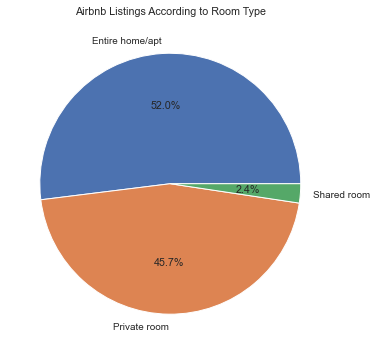

In [196]:
labels = airbnb.room_type.value_counts().index
values = airbnb.room_type.value_counts().values
plt.figure(figsize = (6, 6))
plt.pie(values, labels = labels, autopct = '%1.1f%%')
plt.title('Airbnb Listings According to Room Type')
plt.show()

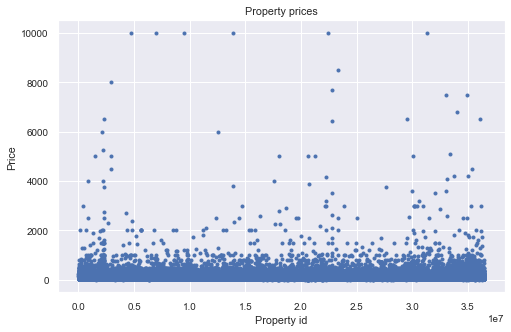

In [192]:
plt.figure(figsize=(8,5))
plt.scatter(x='id', y='price', data = airbnb, marker = '.')
plt.title('Property prices')
plt.xlabel('Property id')
plt.ylabel('Price')
plt.show()

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

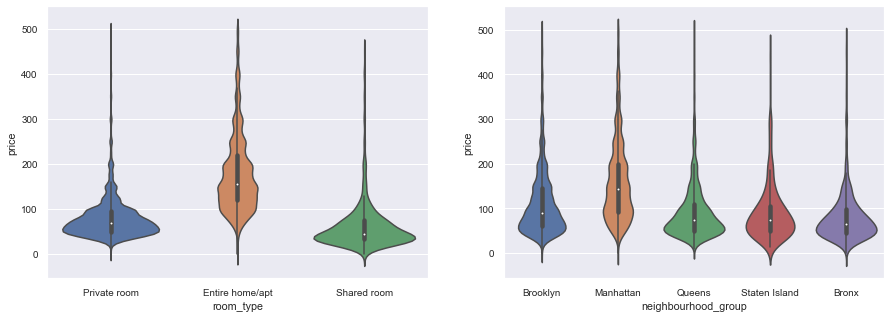

In [185]:
#we can see from above plot that we have some extreme values, therefore we need to remove them for the sake of a better visualization
sub1 = airbnb[airbnb.price < 500]

plt.figure(figsize=(15,5))
#using violinplot to showcase density and distribtuion of price
plt.subplot(1,2,1)
sns.violinplot(x = 'room_type', y = 'price', data = sub1)

plt.subplot(1,2,2)
sns.violinplot(x = 'neighbourhood_group', y = 'price', data = sub1)

**Map of Neighbourhood Group**

C:\Users\spider\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


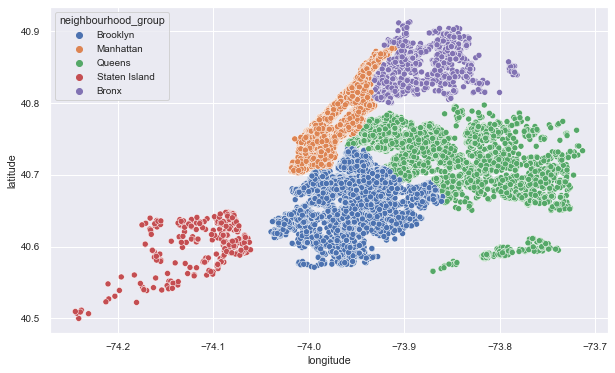

In [183]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.ioff()

**Map of Availablity of room**

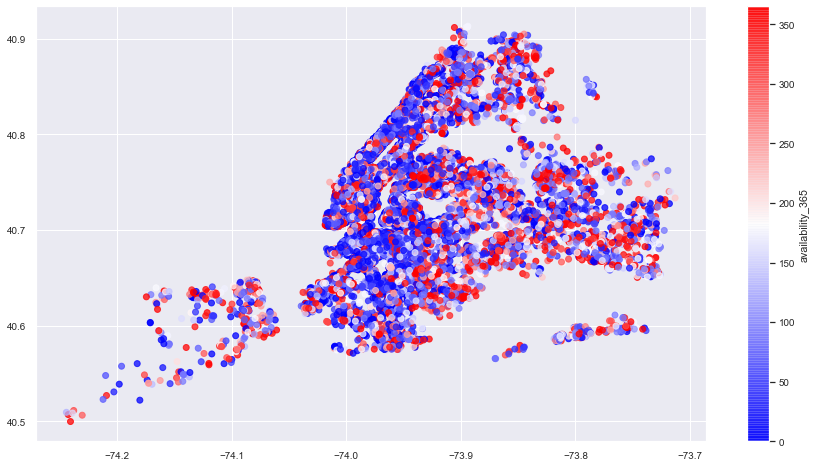

In [184]:
plt.figure(figsize=(15, 8))
plt.scatter(airbnb.longitude, airbnb.latitude, c=airbnb.availability_365,  cmap='bwr', linewidth=1, alpha=0.75)
cbar = plt.colorbar()
cbar.set_label('availability_365')

**Relationship between neighbourhood group and availability of room**

<AxesSubplot:xlabel='neighbourhood_group', ylabel='availability_365'>

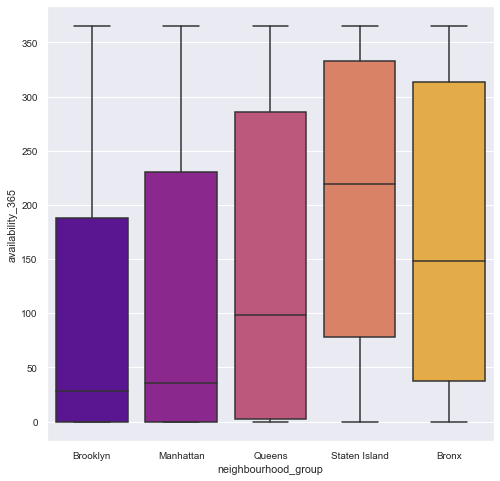

In [180]:
plt.figure(figsize=(8,8))
sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')

**Map of Price distribution**

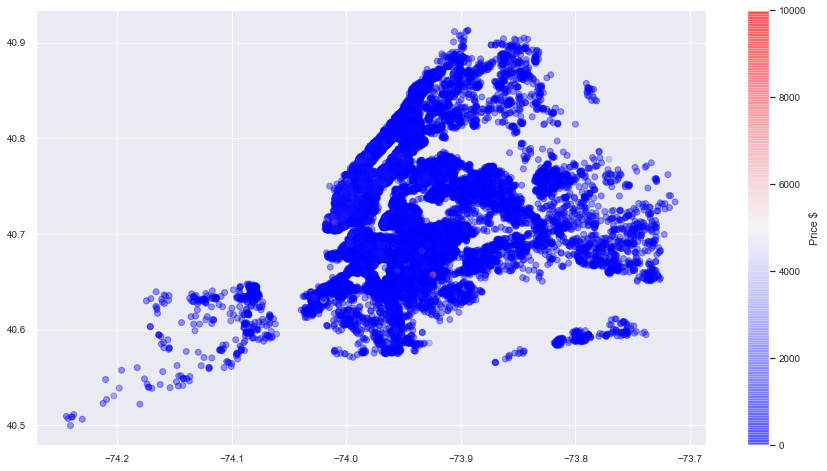

In [181]:
plt.figure(figsize=(15, 8))
plt.scatter(airbnb.longitude, airbnb.latitude, c=airbnb.price, cmap='bwr', linewidth=1, alpha=0.4)
cbar = plt.colorbar()
cbar.set_label('Price $')

**Map of Price (< $500) distribution**

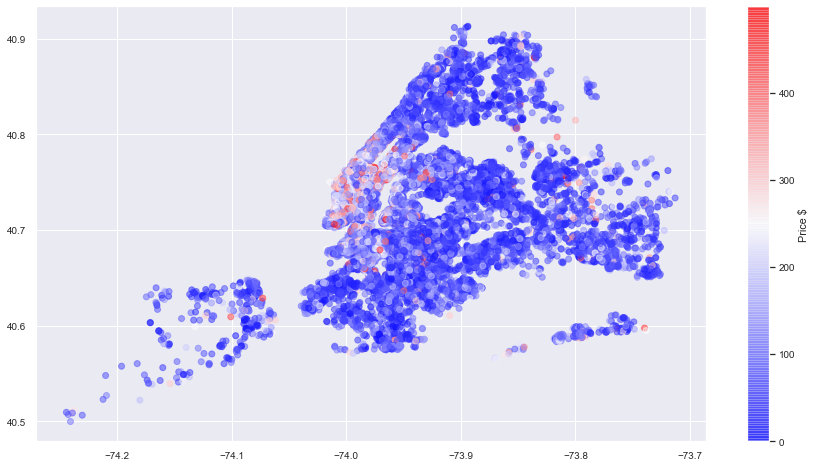

In [182]:
plt.figure(figsize=(15, 8))
plt.scatter(sub1.longitude, sub1.latitude, c=sub1.price, cmap='bwr', linewidth=1, alpha=0.5)
cbar = plt.colorbar()
cbar.set_label('Price $')

<BarContainer object of 10 artists>

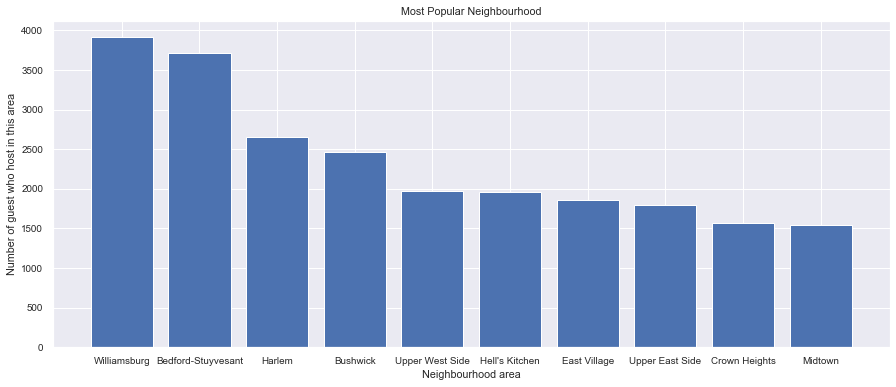

In [171]:
sns.set(font_scale=0.9)
sub2 = airbnb.neighbourhood.value_counts()[:10]
plt.figure(figsize=(15, 6))
x = list(sub2.index)
y = list(sub2.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Number of guest who host in this area")
plt.xlabel("Neighbourhood area")

plt.bar(x, y)

In [137]:
sub3 = airbnb[['neighbourhood', 'price']]
sub3 = sub3.groupby('neighbourhood').mean().sort_values(by = 'price', ascending = False)

<BarContainer object of 10 artists>

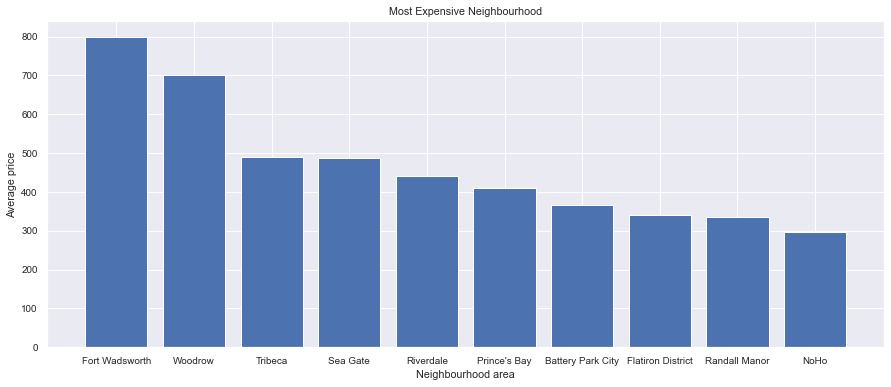

In [172]:
sub3_a = sub3[:10]
plt.figure(figsize=(15, 6))
x = list(sub3_a.index)
y = list(sub3_a.price)

plt.title("Most Expensive Neighbourhood")
plt.ylabel("Average price")
plt.xlabel("Neighbourhood area")

plt.bar(x,y)

<BarContainer object of 10 artists>

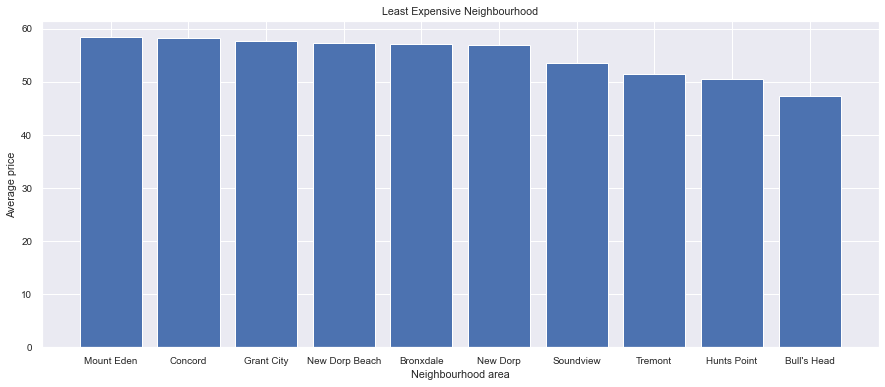

In [173]:
sub3_b = sub3[-10:]
plt.figure(figsize=(15, 6))
x = list(sub3_b.index)
y = list(sub3_b.price)

plt.title("Least Expensive Neighbourhood")
plt.ylabel("Average price")
plt.xlabel("Neighbourhood area")

plt.bar(x,y)

**Correlation Matrix**

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

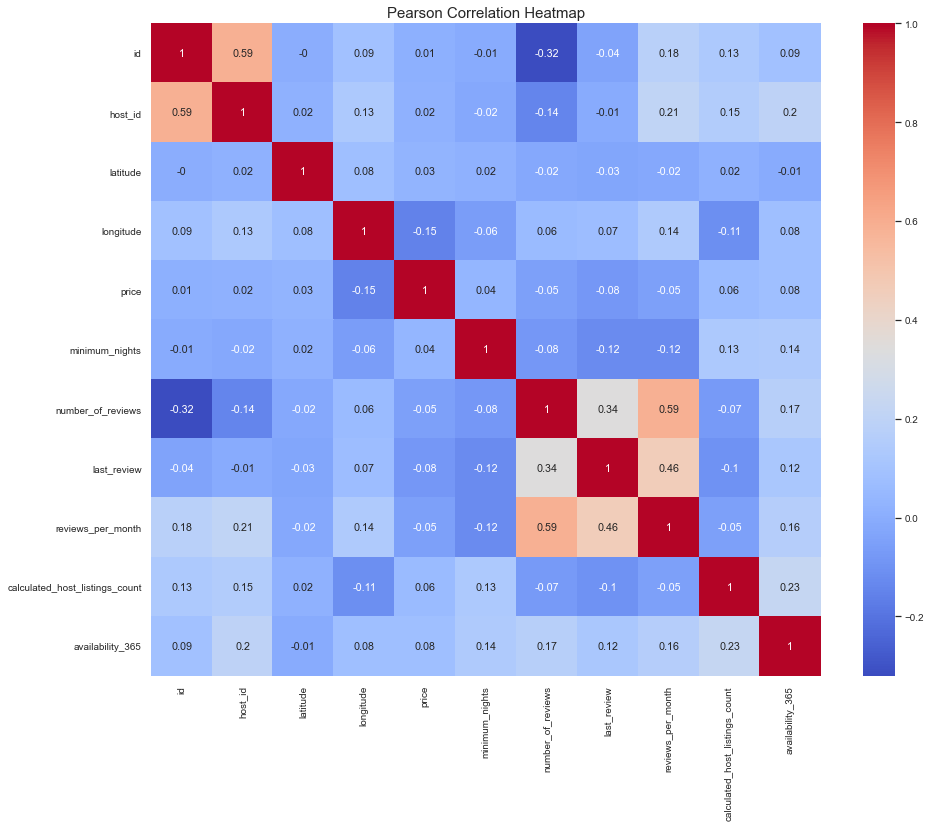

In [179]:
f, ax = plt.subplots(figsize=(15, 12))
hm = sns.heatmap(round(airbnb.corr(),2), annot=True, ax=ax, cmap="coolwarm")
plt.title('Pearson Correlation Heatmap', fontsize = 15)

The correlation plot shows that there is no strong relationship between price and other features.